#### Thanks to:
- Amira Adel Foda (intake 42 - smart village branch - group 2)
- Asmaa Said (intake 42 - smart village branch - group 2)
- Marawan Mohamed (intake 42 - Alex. branch - group 2)


### Installing MediaPipe

In [ ]:
%%capture
!pip install mediapipe

### Required Libraries

In [ ]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

### Dowlining Data

In [ ]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [ ]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [ ]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

### Preparing Data

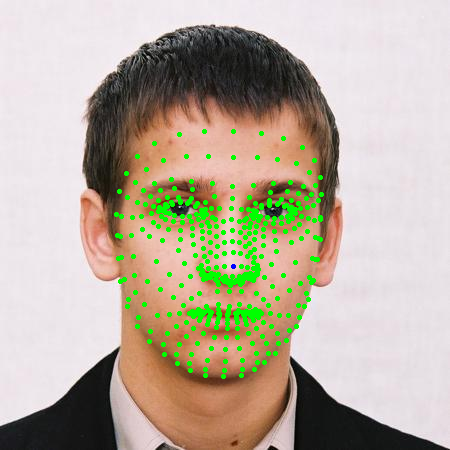

In [ ]:
# choosing random image
random_file = 'image00053'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None:
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          i = 0
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              if i == 4:
                  cv2.circle(image, (relative_x, relative_y), radius=1, color=(255, 0, 0), thickness=2)
              else:
                  cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
              i += 1
      cv2_imshow(image)

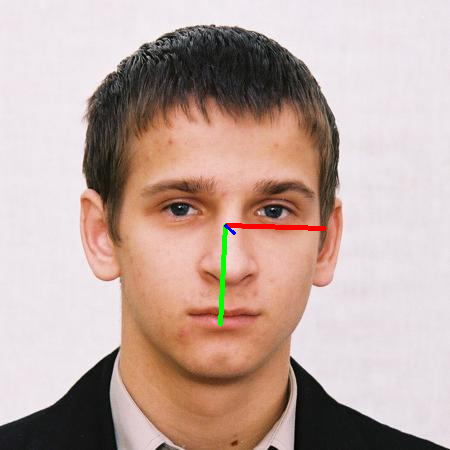

In [ ]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

**notes:** <br>
media pipe >> input >> points of face (x, y) <br>
map file >> 3 axis >> y "target"

In [ ]:
directory = '/content/AFLW2000'
images_list = []

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        images_list.append(filename)
print(images_list)

['image02817.jpg', 'image00984.jpg', 'image02464.jpg', 'image01867.jpg', 'image02996.jpg', 'image01624.jpg', 'image03625.jpg', 'image02941.jpg', 'image01783.jpg', 'image01324.jpg', 'image00544.jpg', 'image01989.jpg', 'image03457.jpg', 'image01780.jpg', 'image02474.jpg', 'image00263.jpg', 'image02792.jpg', 'image03524.jpg', 'image00943.jpg', 'image00451.jpg', 'image01059.jpg', 'image04168.jpg', 'image00215.jpg', 'image00988.jpg', 'image03872.jpg', 'image03578.jpg', 'image03539.jpg', 'image03785.jpg', 'image01466.jpg', 'image00054.jpg', 'image00022.jpg', 'image03542.jpg', 'image00352.jpg', 'image00052.jpg', 'image03128.jpg', 'image04130.jpg', 'image01919.jpg', 'image03721.jpg', 'image02990.jpg', 'image03638.jpg', 'image01360.jpg', 'image03391.jpg', 'image01010.jpg', 'image03893.jpg', 'image02490.jpg', 'image01352.jpg', 'image00087.jpg', 'image00741.jpg', 'image00665.jpg', 'image00695.jpg', 'image03886.jpg', 'image01054.jpg', 'image03103.jpg', 'image01738.jpg', 'image00400.jpg', 'image028

In [ ]:
all_data_imgs = []
all_name_imgs = []

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file

for img in images_list:
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      current_data_img = []
      # loading the image
      image = cv2.imread('/content/AFLW2000/'+img)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None:
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                shape = image.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                current_data_img.append(relative_x)
                current_data_img.append(relative_y)
                # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                # cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            all_name_imgs.append(img)
            all_data_imgs.append(current_data_img)
        # cv2_imshow(image)

In [ ]:
data_arr = np.array(all_data_imgs,dtype=np.float32)
df = pd.DataFrame(data_arr) #convert to a dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,239.0,300.0,244.0,271.0,237.0,282.0,233.0,247.0,244.0,263.0,...,245.0,233.0,243.0,234.0,242.0,234.0,275.0,234.0,278.0,229.0
1,233.0,271.0,220.0,246.0,225.0,259.0,203.0,235.0,216.0,240.0,...,223.0,218.0,220.0,221.0,218.0,221.0,255.0,203.0,257.0,196.0
2,242.0,313.0,232.0,293.0,235.0,296.0,212.0,259.0,228.0,284.0,...,233.0,212.0,229.0,217.0,227.0,221.0,276.0,188.0,279.0,184.0
3,217.0,319.0,192.0,296.0,210.0,298.0,186.0,266.0,187.0,288.0,...,218.0,222.0,213.0,228.0,209.0,232.0,253.0,204.0,256.0,198.0
4,221.0,293.0,203.0,260.0,214.0,273.0,192.0,241.0,200.0,251.0,...,228.0,215.0,222.0,219.0,218.0,221.0,266.0,196.0,269.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,205.0,307.0,198.0,279.0,208.0,289.0,212.0,245.0,201.0,269.0,...,270.0,236.0,263.0,236.0,257.0,236.0,319.0,253.0,326.0,252.0
1849,213.0,280.0,204.0,252.0,211.0,265.0,200.0,237.0,203.0,245.0,...,233.0,225.0,228.0,227.0,224.0,227.0,266.0,217.0,270.0,212.0
1850,224.0,302.0,205.0,288.0,218.0,289.0,197.0,263.0,201.0,282.0,...,224.0,225.0,221.0,230.0,217.0,233.0,258.0,208.0,261.0,202.0
1851,241.0,295.0,259.0,277.0,243.0,281.0,252.0,256.0,262.0,272.0,...,245.0,237.0,244.0,239.0,246.0,241.0,252.0,238.0,252.0,236.0


In [ ]:
all_mat_imgs = []
for img in all_name_imgs:
    all_mat_imgs.append(img.replace('.jpg', '.mat'))

In [ ]:
data = []
for img in all_mat_imgs:
  # image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
  # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
  mat_file = sio.loadmat('/content/AFLW2000/'+img)
  # extracting the labels 3 angels
  pose_para = mat_file["Pose_Para"][0][:3]
  pitch = pose_para[0]
  yaw = pose_para[1]
  roll = pose_para[2]
  data.append({'img': img, 'pitch': pitch, 'yaw': yaw, 'roll': roll})
df_pose = pd.DataFrame(data)
df_pose

,img,pitch,yaw,roll
0,image02817.mat,-0.035379,-0.688966,0.044705
1,image00984.mat,0.177109,0.104754,-0.510974
2,image02464.mat,-0.238554,-0.004551,-0.354145
3,image01867.mat,-0.461888,0.923181,-0.646841
4,image02996.mat,0.194252,0.389626,-0.354715
...,...,...,...,...
1848,image01812.mat,-0.296243,0.483556,0.363866
1849,image02024.mat,0.286645,0.377839,-0.180049
1850,image01971.mat,-0.498263,0.474515,-0.442345
1851,image03860.mat,-0.588955,-1.009718,0.531890


In [ ]:
merged_df = df.merge(df_pose, left_index=True, right_index=True)
merged_df

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img,pitch,yaw,roll
0,239.0,300.0,244.0,271.0,237.0,282.0,233.0,247.0,244.0,263.0,...,242.0,234.0,275.0,234.0,278.0,229.0,image02817.mat,-0.035379,-0.688966,0.044705
1,233.0,271.0,220.0,246.0,225.0,259.0,203.0,235.0,216.0,240.0,...,218.0,221.0,255.0,203.0,257.0,196.0,image00984.mat,0.177109,0.104754,-0.510974
2,242.0,313.0,232.0,293.0,235.0,296.0,212.0,259.0,228.0,284.0,...,227.0,221.0,276.0,188.0,279.0,184.0,image02464.mat,-0.238554,-0.004551,-0.354145
3,217.0,319.0,192.0,296.0,210.0,298.0,186.0,266.0,187.0,288.0,...,209.0,232.0,253.0,204.0,256.0,198.0,image01867.mat,-0.461888,0.923181,-0.646841
4,221.0,293.0,203.0,260.0,214.0,273.0,192.0,241.0,200.0,251.0,...,218.0,221.0,266.0,196.0,269.0,190.0,image02996.mat,0.194252,0.389626,-0.354715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,205.0,307.0,198.0,279.0,208.0,289.0,212.0,245.0,201.0,269.0,...,257.0,236.0,319.0,253.0,326.0,252.0,image01812.mat,-0.296243,0.483556,0.363866
1849,213.0,280.0,204.0,252.0,211.0,265.0,200.0,237.0,203.0,245.0,...,224.0,227.0,266.0,217.0,270.0,212.0,image02024.mat,0.286645,0.377839,-0.180049
1850,224.0,302.0,205.0,288.0,218.0,289.0,197.0,263.0,201.0,282.0,...,217.0,233.0,258.0,208.0,261.0,202.0,image01971.mat,-0.498263,0.474515,-0.442345
1851,241.0,295.0,259.0,277.0,243.0,281.0,252.0,256.0,262.0,272.0,...,246.0,241.0,252.0,238.0,252.0,236.0,image03860.mat,-0.588955,-1.009718,0.531890


In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
merged_df = pd.read_csv('merged_data.csv')
merged_df

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img,pitch,yaw,roll
0,239.0,300.0,244.0,271.0,237.0,282.0,233.0,247.0,244.0,263.0,...,242.0,234.0,275.0,234.0,278.0,229.0,image02817.mat,-0.035379,-0.688966,0.044705
1,233.0,271.0,220.0,246.0,225.0,259.0,203.0,235.0,216.0,240.0,...,218.0,221.0,255.0,203.0,257.0,196.0,image00984.mat,0.177109,0.104754,-0.510974
2,242.0,313.0,232.0,293.0,235.0,296.0,212.0,259.0,228.0,284.0,...,227.0,221.0,276.0,188.0,279.0,184.0,image02464.mat,-0.238554,-0.004551,-0.354145
3,217.0,319.0,192.0,296.0,210.0,298.0,186.0,266.0,187.0,288.0,...,209.0,232.0,253.0,204.0,256.0,198.0,image01867.mat,-0.461888,0.923181,-0.646841
4,221.0,293.0,203.0,260.0,214.0,273.0,192.0,241.0,200.0,251.0,...,218.0,221.0,266.0,196.0,269.0,190.0,image02996.mat,0.194252,0.389626,-0.354715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,205.0,307.0,198.0,279.0,208.0,289.0,212.0,245.0,201.0,269.0,...,257.0,236.0,319.0,253.0,326.0,252.0,image01812.mat,-0.296243,0.483556,0.363866
1849,213.0,280.0,204.0,252.0,211.0,265.0,200.0,237.0,203.0,245.0,...,224.0,227.0,266.0,217.0,270.0,212.0,image02024.mat,0.286645,0.377839,-0.180049
1850,224.0,302.0,205.0,288.0,218.0,289.0,197.0,263.0,201.0,282.0,...,217.0,233.0,258.0,208.0,261.0,202.0,image01971.mat,-0.498263,0.474515,-0.442345
1851,241.0,295.0,259.0,277.0,243.0,281.0,252.0,256.0,262.0,272.0,...,246.0,241.0,252.0,238.0,252.0,236.0,image03860.mat,-0.588955,-1.009718,0.531890


In [ ]:
merged_df[merged_df['img']=='image01822.mat']

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,img,pitch,yaw,roll
896,194.0,290.0,184.0,266.0,197.0,276.0,194.0,248.0,185.0,259.0,...,226.0,240.0,266.0,242.0,272.0,240.0,image01822.mat,-0.034477,1.155661,0.201974


In [ ]:
# from sklearn.datasets import load_linnerud
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVR
import sklearn.metrics as sm
from sklearn.linear_model import Lasso, RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn.multioutput import MultiOutputRegressor
# from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
features_df = merged_df.drop(columns=['img', 'pitch', 'yaw', 'roll'])
features_df

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,239.0,300.0,244.0,271.0,237.0,282.0,233.0,247.0,244.0,263.0,...,245.0,233.0,243.0,234.0,242.0,234.0,275.0,234.0,278.0,229.0
1,233.0,271.0,220.0,246.0,225.0,259.0,203.0,235.0,216.0,240.0,...,223.0,218.0,220.0,221.0,218.0,221.0,255.0,203.0,257.0,196.0
2,242.0,313.0,232.0,293.0,235.0,296.0,212.0,259.0,228.0,284.0,...,233.0,212.0,229.0,217.0,227.0,221.0,276.0,188.0,279.0,184.0
3,217.0,319.0,192.0,296.0,210.0,298.0,186.0,266.0,187.0,288.0,...,218.0,222.0,213.0,228.0,209.0,232.0,253.0,204.0,256.0,198.0
4,221.0,293.0,203.0,260.0,214.0,273.0,192.0,241.0,200.0,251.0,...,228.0,215.0,222.0,219.0,218.0,221.0,266.0,196.0,269.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,205.0,307.0,198.0,279.0,208.0,289.0,212.0,245.0,201.0,269.0,...,270.0,236.0,263.0,236.0,257.0,236.0,319.0,253.0,326.0,252.0
1849,213.0,280.0,204.0,252.0,211.0,265.0,200.0,237.0,203.0,245.0,...,233.0,225.0,228.0,227.0,224.0,227.0,266.0,217.0,270.0,212.0
1850,224.0,302.0,205.0,288.0,218.0,289.0,197.0,263.0,201.0,282.0,...,224.0,225.0,221.0,230.0,217.0,233.0,258.0,208.0,261.0,202.0
1851,241.0,295.0,259.0,277.0,243.0,281.0,252.0,256.0,262.0,272.0,...,245.0,237.0,244.0,239.0,246.0,241.0,252.0,238.0,252.0,236.0


In [ ]:
# Target Data
pitch = merged_df['pitch']
yaw = merged_df['yaw']
roll = merged_df['roll']

In [ ]:
# center the data at nose (landmark = 4) which is index 8, 9 for x and y axis in the data frame
features_df.iloc[:,::2] = features_df.iloc[:,::2].sub(features_df['8'], axis=0)
features_df.iloc[:,1::2] = features_df.iloc[:,1::2].sub(features_df['9'], axis=0)

In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,-5.0,37.0,0.0,8.0,-7.0,19.0,-11.0,-16.0,0.0,0.0,...,1.0,-30.0,-1.0,-29.0,-2.0,-29.0,31.0,-29.0,34.0,-34.0
1,17.0,31.0,4.0,6.0,9.0,19.0,-13.0,-5.0,0.0,0.0,...,7.0,-22.0,4.0,-19.0,2.0,-19.0,39.0,-37.0,41.0,-44.0
2,14.0,29.0,4.0,9.0,7.0,12.0,-16.0,-25.0,0.0,0.0,...,5.0,-72.0,1.0,-67.0,-1.0,-63.0,48.0,-96.0,51.0,-100.0
3,30.0,31.0,5.0,8.0,23.0,10.0,-1.0,-22.0,0.0,0.0,...,31.0,-66.0,26.0,-60.0,22.0,-56.0,66.0,-84.0,69.0,-90.0
4,21.0,42.0,3.0,9.0,14.0,22.0,-8.0,-10.0,0.0,0.0,...,28.0,-36.0,22.0,-32.0,18.0,-30.0,66.0,-55.0,69.0,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,4.0,38.0,-3.0,10.0,7.0,20.0,11.0,-24.0,0.0,0.0,...,69.0,-33.0,62.0,-33.0,56.0,-33.0,118.0,-16.0,125.0,-17.0
1849,10.0,35.0,1.0,7.0,8.0,20.0,-3.0,-8.0,0.0,0.0,...,30.0,-20.0,25.0,-18.0,21.0,-18.0,63.0,-28.0,67.0,-33.0
1850,23.0,20.0,4.0,6.0,17.0,7.0,-4.0,-19.0,0.0,0.0,...,23.0,-57.0,20.0,-52.0,16.0,-49.0,57.0,-74.0,60.0,-80.0
1851,-21.0,23.0,-3.0,5.0,-19.0,9.0,-10.0,-16.0,0.0,0.0,...,-17.0,-35.0,-18.0,-33.0,-16.0,-31.0,-10.0,-34.0,-10.0,-36.0


In [ ]:
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(features_df)

In [ ]:
scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(features_df)

In [ ]:
pca = PCA(n_components = 7)
pca_df = pca.fit_transform(scaled_df1)

In [ ]:
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.9914572445803868


In [ ]:
print("variance ratio: ", pca.explained_variance_ratio_)

variance ratio:  [0.33552776 0.24659879 0.20289581 0.17590551 0.02012133 0.00524025
 0.00516779]


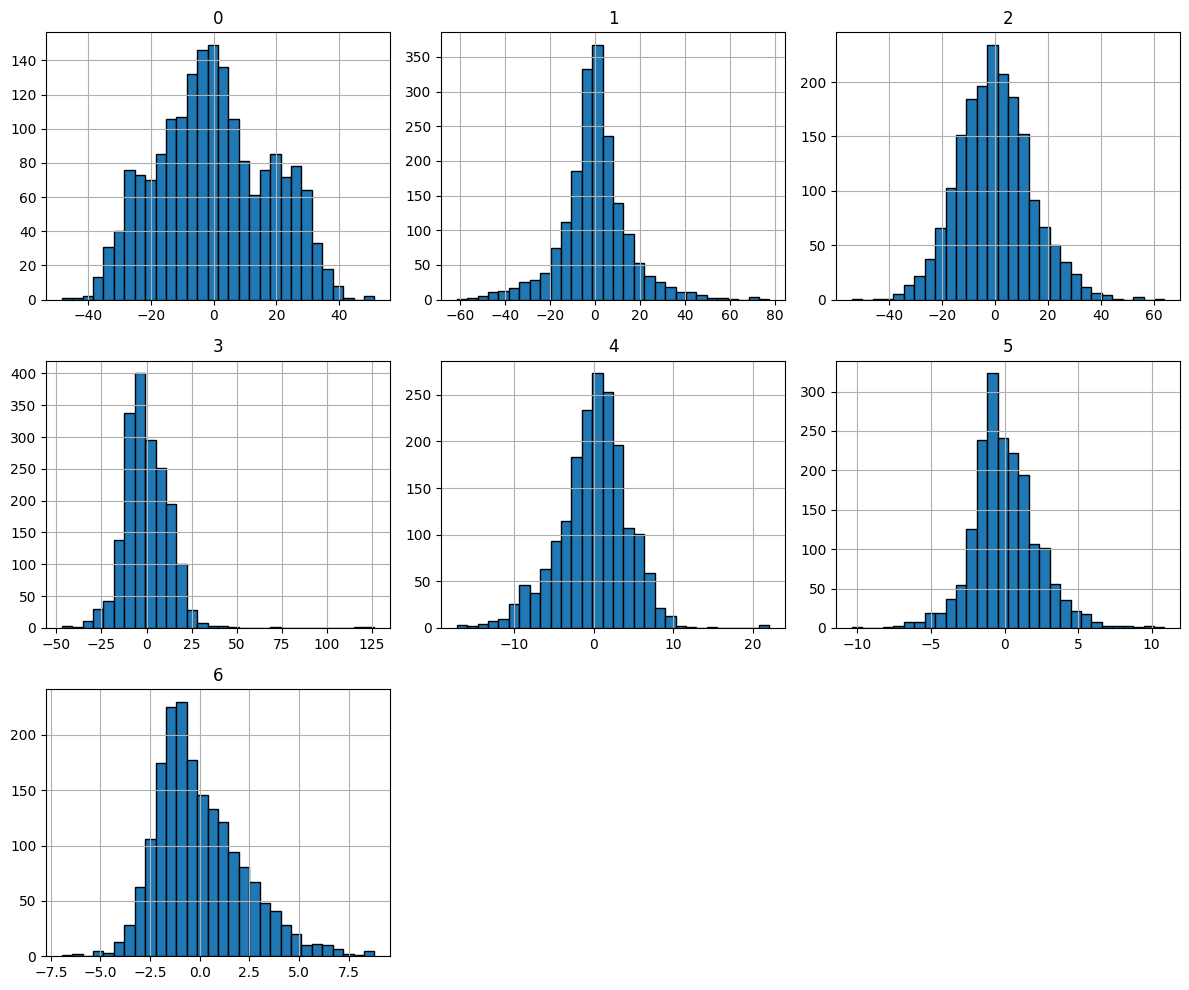

In [ ]:
pca_df_df = pd.DataFrame(pca_df)

# Draw histograms for all columns
pca_df_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# # Splitting the dataset into training (80%) and testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(pca_df, pitch, test_size=0.2, random_state=42)
# # Splitting the training set into training (60%) and validation (20%)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# # Splitting the dataset into training (90%) and testing (10%)
# X_train, X_test, y_train, y_test = train_test_split(pca_df, pitch, test_size=0.1, random_state=42)

# # Further splitting the training set into training (80%) and validation (10%)
# # Since we already have 90% for training, we need to split 10% of the original data (11.11% of the remaining) into validation
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

In [ ]:
columns = ['Model', 'Pitch', 'Yaw', 'Roll']
r2_score_df = pd.DataFrame(columns=columns)

In [ ]:
# Splitting the dataset into training (90%) and testing (10%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(pca_df, pitch, test_size=0.1, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(pca_df, yaw, test_size=0.1, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(pca_df, roll, test_size=0.1, random_state=42)

### 1.SVR Model

Pitch

In [ ]:
svr_model1 = SVR()
svr_model1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, svr_model1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, svr_model1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, svr_model1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, svr_model1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, svr_model1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.08
Mean squared error = 0.02
Median absolute error = 0.05
Explain variance score = 0.74
R2 score = 0.74


Yaw

In [ ]:
svr_model2 = SVR()
svr_model2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, svr_model2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, svr_model2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, svr_model2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, svr_model2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, svr_model2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.96
R2 score = 0.96


Roll

In [ ]:
svr_model3 = SVR()
svr_model3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, svr_model3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, svr_model3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, svr_model3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, svr_model3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, svr_model3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.06
Mean squared error = 0.01
Median absolute error = 0.04
Explain variance score = 0.88
R2 score = 0.88


In [ ]:
new_row = {'Model': 'SVR',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

### 2.Linear Regression Model

Pitch

In [ ]:
LR_model1 = LinearRegression()
LR_model1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, LR_model1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, LR_model1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, LR_model1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, LR_model1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, LR_model1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explain variance score = 0.62
R2 score = 0.62


Yaw

In [ ]:
LR_model2 = LinearRegression()
LR_model2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, LR_model2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, LR_model2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, LR_model2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, LR_model2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, LR_model2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.08
Explain variance score = 0.89
R2 score = 0.89


Roll

In [ ]:
LR_model3 = LinearRegression()
LR_model3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, LR_model3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, LR_model3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, LR_model3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, LR_model3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, LR_model3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.09
Explain variance score = 0.75
R2 score = 0.75


In [ ]:
new_row = {'Model': 'Linear Reg',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75


### 3.RidgeCV Model

Pitch

In [ ]:
ridgeCV_model1 = RidgeCV()
ridgeCV_model1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, ridgeCV_model1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, ridgeCV_model1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, ridgeCV_model1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, ridgeCV_model1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, ridgeCV_model1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explain variance score = 0.62
R2 score = 0.62


Yaw

In [ ]:
ridgeCV_model2 = RidgeCV()
ridgeCV_model2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, ridgeCV_model2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, ridgeCV_model2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, ridgeCV_model2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, ridgeCV_model2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, ridgeCV_model2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.08
Explain variance score = 0.89
R2 score = 0.89


Roll

In [ ]:
ridgeCV_model3 = RidgeCV()
ridgeCV_model3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, ridgeCV_model3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, ridgeCV_model3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, ridgeCV_model3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, ridgeCV_model3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, ridgeCV_model3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.09
Explain variance score = 0.75
R2 score = 0.75


In [ ]:
new_row = {'Model': 'RidgeCV',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75
2,RidgeCV,0.62,0.89,0.75


### 4.Lasso Model

Pitch

In [ ]:
lasso_model1 = Lasso(alpha=0.01)
lasso_model1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, lasso_model1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, lasso_model1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, lasso_model1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, lasso_model1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, lasso_model1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explain variance score = 0.62
R2 score = 0.62


Yaw

In [ ]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, lasso_model2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, lasso_model2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, lasso_model2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, lasso_model2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, lasso_model2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.13
Mean squared error = 0.03
Median absolute error = 0.08
Explain variance score = 0.89
R2 score = 0.89


Roll

In [ ]:
lasso_model3 = Lasso(alpha=0.01)
lasso_model3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, lasso_model3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, lasso_model3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, lasso_model3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, lasso_model3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, lasso_model3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.09
Explain variance score = 0.75
R2 score = 0.75


In [ ]:
new_row = {'Model': 'Lasso',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

### 5.Decision Tree Regressor

Pitch

In [ ]:
decision_tree1 = DecisionTreeRegressor()
decision_tree1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, decision_tree1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, decision_tree1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, decision_tree1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, decision_tree1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, decision_tree1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.11
Mean squared error = 0.03
Median absolute error = 0.07
Explain variance score = 0.52
R2 score = 0.52


Yaw

In [ ]:
decision_tree2 = DecisionTreeRegressor()
decision_tree2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, decision_tree2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, decision_tree2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, decision_tree2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, decision_tree2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, decision_tree2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.11
Mean squared error = 0.04
Median absolute error = 0.07
Explain variance score = 0.87
R2 score = 0.86


Roll

In [ ]:
decision_tree3 = DecisionTreeRegressor()
decision_tree3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, decision_tree3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, decision_tree3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, decision_tree3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, decision_tree3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, decision_tree3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.09
Mean squared error = 0.03
Median absolute error = 0.05
Explain variance score = 0.69
R2 score = 0.69


In [ ]:
new_row = {'Model': 'Decision Tree',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75
2,RidgeCV,0.62,0.89,0.75
3,Lasso,0.62,0.89,0.75
4,Decision Tree,0.52,0.86,0.69


### 6.Random Forest Regressor

Pitch

In [ ]:
random_forest1 = RandomForestRegressor()
random_forest1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, random_forest1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, random_forest1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, random_forest1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, random_forest1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, random_forest1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.09
Mean squared error = 0.02
Median absolute error = 0.06
Explain variance score = 0.68
R2 score = 0.68


Yaw

In [ ]:
random_forest2 = RandomForestRegressor()
random_forest2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, random_forest2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, random_forest2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, random_forest2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, random_forest2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, random_forest2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.08
Mean squared error = 0.01
Median absolute error = 0.05
Explain variance score = 0.95
R2 score = 0.95


Roll

In [ ]:
random_forest3 = RandomForestRegressor()
random_forest3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, random_forest3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, random_forest3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, random_forest3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, random_forest3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, random_forest3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.06
Mean squared error = 0.01
Median absolute error = 0.03
Explain variance score = 0.89
R2 score = 0.89


In [ ]:
new_row = {'Model': 'Random Forest',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75
2,RidgeCV,0.62,0.89,0.75
3,Lasso,0.62,0.89,0.75
4,Decision Tree,0.52,0.86,0.69
5,Random Forest,0.68,0.95,0.89


### 7.Gradient Boosting Regressor

Pitch

In [ ]:
GradBoost1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')
GradBoost1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, GradBoost1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, GradBoost1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, GradBoost1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, GradBoost1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, GradBoost1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.1
Mean squared error = 0.03
Median absolute error = 0.07
Explain variance score = 0.63
R2 score = 0.63


Yaw

In [ ]:
GradBoost2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')
GradBoost2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, GradBoost2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, GradBoost2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, GradBoost2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, GradBoost2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, GradBoost2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.08
Mean squared error = 0.03
Median absolute error = 0.05
Explain variance score = 0.91
R2 score = 0.91


Roll

In [ ]:
GradBoost3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')
GradBoost3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, GradBoost3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, GradBoost3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, GradBoost3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, GradBoost3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, GradBoost3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.07
Mean squared error = 0.01
Median absolute error = 0.04
Explain variance score = 0.85
R2 score = 0.85


In [ ]:
new_row = {'Model': 'GradBoost',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75
2,RidgeCV,0.62,0.89,0.75
3,Lasso,0.62,0.89,0.75
4,Decision Tree,0.52,0.86,0.69
5,Random Forest,0.68,0.95,0.89
6,GradBoost,0.63,0.91,0.85


### 8.XGBoost Regressor

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
# print(XGBRegressor.__version__)

Pitch

In [ ]:
XGBoost_model1 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XGBoost_model1.fit(X_train1, y_train1)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test1, XGBoost_model1.predict(X_test1)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test1, XGBoost_model1.predict(X_test1)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test1, XGBoost_model1.predict(X_test1)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test1, XGBoost_model1.predict(X_test1)), 2))
r2_score1 = round(sm.r2_score(y_test1, XGBoost_model1.predict(X_test1)), 2)
print("R2 score =", r2_score1)

Mean absolute error = 0.1
Mean squared error = 0.02
Median absolute error = 0.07
Explain variance score = 0.67
R2 score = 0.66


Yaw

In [ ]:
XGBoost_model2 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XGBoost_model2.fit(X_train2, y_train2)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test2, XGBoost_model2.predict(X_test2)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test2, XGBoost_model2.predict(X_test2)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test2, XGBoost_model2.predict(X_test2)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test2, XGBoost_model2.predict(X_test2)), 2))
r2_score2 = round(sm.r2_score(y_test2, XGBoost_model2.predict(X_test2)), 2)
print("R2 score =", r2_score2)

Mean absolute error = 0.08
Mean squared error = 0.02
Median absolute error = 0.06
Explain variance score = 0.93
R2 score = 0.93


Roll

In [ ]:
XGBoost_model3 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
XGBoost_model3.fit(X_train3, y_train3)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test3, XGBoost_model3.predict(X_test3)), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test3, XGBoost_model3.predict(X_test3)), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test3, XGBoost_model3.predict(X_test3)), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test3, XGBoost_model3.predict(X_test3)), 2))
r2_score3 = round(sm.r2_score(y_test3, XGBoost_model3.predict(X_test3)), 2)
print("R2 score =", r2_score3)

Mean absolute error = 0.06
Mean squared error = 0.01
Median absolute error = 0.03
Explain variance score = 0.88
R2 score = 0.88


In [ ]:
new_row = {'Model': 'XGBoost',
           'Pitch': r2_score1,
           'Yaw': r2_score2,
           'Roll':r2_score3}
new_row_df = pd.DataFrame([new_row])
r2_score_df = pd.concat([r2_score_df, new_row_df], ignore_index=True)

### Summarization of all models and save the choosed one

In [ ]:
r2_score_df

,Model,Pitch,Yaw,Roll
0,SVR,0.74,0.96,0.88
1,Linear Reg,0.62,0.89,0.75
2,RidgeCV,0.62,0.89,0.75
3,Lasso,0.62,0.89,0.75
4,Decision Tree,0.52,0.86,0.69
5,Random Forest,0.68,0.95,0.89
6,GradBoost,0.63,0.91,0.85
7,XGBoost,0.66,0.93,0.88


From the previous table, we can notice that **SVR** model has the highest R2 score in Pitch and Yaw, and **Random forest** in Roll. <br>
So this is the models I will use in our problem.

In [ ]:
# save the best model (SVR)
import joblib
joblib.dump(svr_model1, 'pitch_model.pkl')
joblib.dump(svr_model2, 'yaw_model.pkl')
joblib.dump(random_forest3, 'roll_model.pkl')

['roll_model.pkl']

In [ ]:
import joblib
# Load the model
pitch_model = joblib.load('pitch_model.pkl')
yaw_model = joblib.load('yaw_model.pkl')
roll_model = joblib.load('roll_model.pkl')

# # Use the model for prediction
# prediction = model.predict(some_data)
# print(prediction)

### Try the model with new data

In [39]:
import cv2
import mediapipe as mp

face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

input_video_path ='/content/input1.mp4'

cap = cv2.VideoCapture(input_video_path)

output_video_path = '/content/output1.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (640, 480))  # Change resolution as needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    resized_frame = cv2.resize(frame, (450, 450))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Detect facial landmarks
    results = face_mesh.process(rgb_frame)
    input_data_img = []

    # If landmarks are detected
    if results.multi_face_landmarks:
        # Iterate over each detected face
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                shape = resized_frame.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                input_data_img.append(relative_x)
                input_data_img.append(relative_y)

        input_data_array = np.array(input_data_img).reshape(1, -1)
        tdx = input_data_array[0, 8]
        tdy = input_data_array[0, 9]
        input_data_array[:, ::2] -= input_data_array[:, 8]
        input_data_array[:, 1::2] -= input_data_array[:, 9]

        transformed_img = scaler1.transform(input_data_array)
        pca_img = pca.transform(transformed_img)

        pitch_value = pitch_model.predict(pca_img)
        yaw_value = yaw_model.predict(pca_img)
        roll_value = roll_model.predict(pca_img)

        # Draw the axis of pose on the face
        drawn_img = draw_axis(resized_frame, pitch_value, yaw_value, roll_value, tdx, tdy)
        cv2_imshow(drawn_img)
        # cv2.imshow('Output Video', drawn_img)
        drawn_img = cv2.resize(drawn_img, (640, 480))
        out.write(drawn_img)
    else:
        # Display the frame using cv2_imshow
        cv2_imshow(resized_frame)
        drawn_img = cv2.resize(drawn_img, (640, 480))
        out.write(resized_frame)

cap.release()
out.release()
face_mesh.close()

In [ ]:
from google.colab.patches import cv2_imshow
# Initialize mediapipe FaceMesh
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)

# Open the input video file
cap = cv2.VideoCapture('input_video1.mp4')

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the video's frame width, height, and frame rate
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec
fourcc = cv2.VideoWriter_fourcc('F','M','P','4')
out = cv2.VideoWriter('output_video1.mp4', fourcc, fps, (frame_width, frame_height))

# Process each frame and save it
while cap.isOpened():
    ret, frame = cap.read()

    # If frame is not read successfully, break the loop
    if not ret:
        break

    resized_frame = cv2.resize(frame, (450, 450))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Detect facial landmarks
    results = face_mesh.process(rgb_frame)
    input_data_img = []

    # If landmarks are detected
    if results.multi_face_landmarks:
        # Iterate over each detected face
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                shape = resized_frame.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                input_data_img.append(relative_x)
                input_data_img.append(relative_y)

        input_data_array = np.array(input_data_img).reshape(1, -1)
        tdx = input_data_array[0, 8]
        tdy = input_data_array[0, 9]
        input_data_array[:, ::2] -= input_data_array[:, 8]
        input_data_array[:, 1::2] -= input_data_array[:, 9]

        transformed_img = scaler1.transform(input_data_array)
        pca_img = pca.transform(transformed_img)

        pitch_value = pitch_model.predict(pca_img)
        yaw_value = yaw_model.predict(pca_img)
        roll_value = roll_model.predict(pca_img)

        # Draw the axis of pose on the face
        drawn_img = draw_axis(resized_frame, pitch_value, yaw_value, roll_value, tdx, tdy)
        cv2_imshow(drawn_img)
        # cv2.imshow('Output Video', drawn_img)
        out.write(drawn_img)
    else:
        # Display the frame using cv2_imshow
        cv2_imshow(resized_frame)
        out.write(resized_frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()